___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://http2.mlstatic.com/D_NQ_NP_2X_960089-MLM26807621582_022018-F.webp" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___


### <font color= #2E9AFE> Tema: Selección de Variables</font>

La selección de variables es un proceso donde automáticamente se seleccionan aquellos atributos en nuestros datos que contribuyen más a la variable a predecir. 

Las variables irrelevantes o parcialmente relevantes pueden afectar negativamente el rendimiento del modelo.

Beneficios:
- Reducir sobreajuste: menos datos irrelevantes significan menos oportunidades de tomar decisiones basadas en ruido = mejor performance. 
- Modelo más fácil de entender
- Reduce el tiempo de entrenamiento: menos datos significa que el modelo se entrena más rápido


**Tipos de algoritmos de selección de variables**

- **Supervisado**: se basa la selección en la variable objetivo.

    - Métodos de envoltura: se considera como un problema de búsqueda la selección de un conjunto de variables donde diferentes combinaciones se preparan, evalúan y comparan con otras combinaciones. Se utiliza un modelo predictivo para evaluar una combinación de características y asignar un score basado en la precisión del modelo. 
        - Ejemplo: RFE

    - Métodos de filtrado: estos métodos aplican una medida estadística para asignar una puntuación a cada característica. Las características se clasifican según la puntuación y se seleccionan para conservarlas o eliminarlas del conjunto de datos. Los métodos suelen ser univariados y consideran la característica de forma independiente o con respecto a la variable dependiente.
        - Ejemplo: prueba de chi cuadrada, L-Anova, método de correlación, criterio de la varianza

    - Métodos embebidos: mientras se va creando el modelo el método aprende qué características contribuyen mejor a la precisión. El método más común es el de regularización. 
        - Ejemplo: LASSO, Elastic Net, Ridge, Trees


<img src="https://machinelearningmastery.com/wp-content/uploads/2019/11/Overview-of-Feature-Selection-Techniques3.png" width="550" height="480" align="center"/>


**Mencionando algunas técnicas más comunes:**

- Porcentaje de valores nulos
- Cantidad de variación
- Correlación por parejas
- Mulicolinealidad
- PCA
- Correlación con la variable a predecir (target)
- Forward Selection
- Backward Selection
- Stepwise Selection
- LASSO
- Selección basada en árboles

### Tipos de variables

La decisión de qué medida estadística utilizar en muchos casos depende del tipo de las variables. 

<img src="https://machinelearningmastery.com/wp-content/uploads/2020/06/Overview-of-Data-Variable-Types2.png" width="550" height="480" align="center"/>

Entre más se sepa del tipo de variable es más fácil elegir qué medida estadística se va a utilizar, sobre todo para los métodos de filtrado 

**¿Cómo elegir las mejores variables?**
No es una respuesta fácil, hay que tratar de varias formas.

#### Datos: Glass Identification Data Set
Los datos se pueden encontrar en:
https://archive.ics.uci.edu/ml/datasets/glass+identification

Se busca identificar qué tipo de vidrio es una muestra. 


- 1. Id number: 1 a 214
- 2. RI: Indice Refractivo(medida para saber cuánto se reduce la velocidad de la luz al atravesarlo)
- 3. Na: Sodio (unidad de medida: porcentaje en peso en el óxido correspondiente, como son los atributos 4-10)
- 4. Mg: Magenesio
- 5. Al: Aluminio
- 6. Si: Silicon
- 7. K: Potasio
- 8. Ca: Calcio
- 9. Ba: Bario
- 10. Fe: Hierro
- 11. Tipo de Vidrio: 
-- 1 ventanas de edificios procesadas por flotación 
-- 2 ventanas de edificios no procesadas por flotación 
-- 3 ventanas de vehículos procesadas por flotación
-- 4 ventanas de vehículos no procesadas por flotación 
-- 5 contenedores
-- 6 vajilla
-- 7 faros

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="350px" height="180px" />

In [1]:
#Importar librerías
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos del vidrio (variable a predecir categórica)
data = pd.read_csv('glass.data',header=None)
names = ['ID','Indice_Refraccion','Na','Mg','Al','Si','K', 'Ca','Ba','Fe','Tipo_Vidrio']
data.columns = names

In [2]:
data.head()

,ID,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo_Vidrio
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Métodos de Filtrado

## Métodos de eliminación sólo variables predictoras (X)

### Eliminar variable con % de datos nulos

Cuando hay muchos datos nulos, es difícil para el algoritmo aprender de esos datos (ya que no hay nada)

Hay 2 opciones:
1. Quitar variables que tienen un % alto de datos nulos

   (\# de datos con valores nulos/ \# total de datos) 
   
   
2. Crear indicadores binarios que explícitamente digan existente / valor nulo




### Criterio de la Varianza

Este algoritmo se enfoca sólo en las variables independientes (X) y NO en la variables a predecir (y), por eso se le puede usar para aprendizaje no supervisado. 

Si la variable tiene casi los mismos valores, entonces el modelo no va a aprender nada de esa variable. 


$$\begin{matrix} 5 & 19 & 6.8 & 100 & 22\\ 5 & 25 & 7.2 & 150 & 23\\ 5 & 15 & 4.5 & 90 & 19\\ 4 & 30 & 8.9 & 125 & 25\\ 5 & 18 & 9.5 & 75 & 15\\\end{matrix}$$

Se recomienda estandarizar todas las variables para tomar encuenta las diferentes escalas.

Por lo general se remueven las variables con varianza muy cercana a cero. 

Métricas de evaluación:
- Con un umbral de varianza. Se remueven las variables cuya varianza no alcanza el límite propuesto. 
- La proporción entre valores únicos y el total de muestras es bajo $\frac{Valores_{unicos}}{muestras_{totales}}<0.1$

In [3]:
#Tomamos sólo variables de interés (variables predictoras X)
data.iloc[:,1:10]

,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [4]:
#Estandarizar los datos
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = data.columns[1:10]
d = scaler.fit_transform(data.iloc[:,1:10])
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


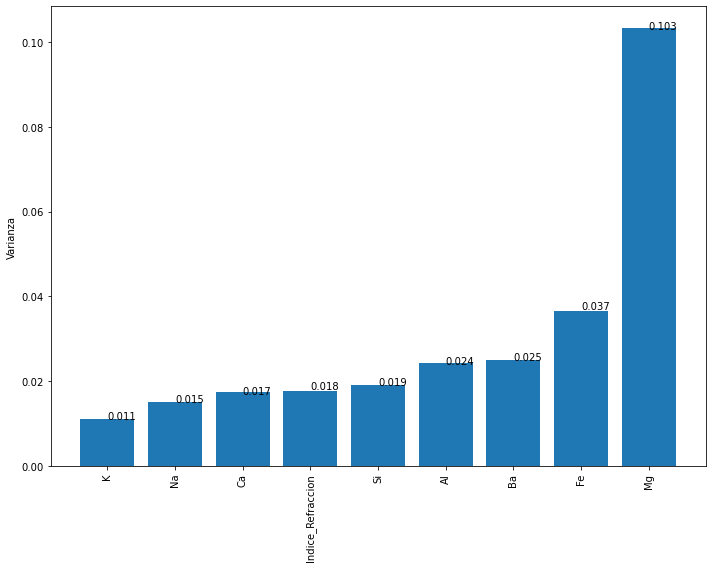

In [5]:
# Umbral de la varianza (threshold) A Mano

varianzas = pd.DataFrame(scaled_df.var().sort_values(),columns=["Varianza"])

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,round(y[i],3),round(y[i],3))

fig = plt.figure(figsize=(10,8))
plt.bar(np.arange(len(varianzas)),varianzas.Varianza)
plt.ylabel('Varianza')
plt.xticks(np.arange(len(varianzas)),varianzas.index,rotation=90)
addlabels(np.arange(len(varianzas)), varianzas.Varianza)
plt.tight_layout()
plt.show()

¿A mano cómo selecciono las variables una vez calculada la varianza?

Selecciono un "threshold" o valor, como límite para tomar mi decisión. 
Por ejemplo:

Yo quiero sólo quedarme con los datos que varíen más de 0.02

Threhold = 0.02

Por lo tanto, me quedo sólo con las variables de: Al, Ba, Fe y Mg


In [6]:
#Con librería
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.02)
sel.fit_transform(scaled_df)

array([[1.        , 0.25233645, 0.        , 0.        ],
       [0.80178174, 0.33333333, 0.        , 0.        ],
       [0.79064588, 0.3894081 , 0.        , 0.        ],
       [0.82182628, 0.31152648, 0.        , 0.        ],
       [0.80623608, 0.29595016, 0.        , 0.        ],
       [0.80400891, 0.41433022, 0.        , 0.50980392],
       [0.80178174, 0.26479751, 0.        , 0.        ],
       [0.80400891, 0.23676012, 0.        , 0.        ],
       [0.79732739, 0.3364486 , 0.        , 0.        ],
       [0.80178174, 0.33333333, 0.        , 0.21568627],
       [0.77060134, 0.39563863, 0.        , 0.47058824],
       [0.81514477, 0.30529595, 0.        , 0.        ],
       [0.76391982, 0.34579439, 0.        , 0.47058824],
       [0.79287305, 0.30529595, 0.        , 0.33333333],
       [0.79955457, 0.31775701, 0.        , 0.        ],
       [0.78841871, 0.29283489, 0.        , 0.        ],
       [0.81737194, 0.27102804, 0.        , 0.        ],
       [0.85746102, 0.18691589,

¿Qué significa este resultado? 


In [7]:
scaled_df.head(20)

,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.000000
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.000000
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.000000
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.000000
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.000000
5,0.211150,0.309774,0.804009,0.414330,0.564286,0.103060,0.245353,0.0,0.509804
6,0.275680,0.386466,0.801782,0.264798,0.585714,0.093398,0.254647,0.0,0.000000
7,0.281387,0.363910,0.804009,0.236760,0.612500,0.091787,0.261152,0.0,0.000000
8,0.352502,0.497744,0.797327,0.336449,0.405357,0.090177,0.266729,0.0,0.000000
9,0.280948,0.341353,0.801782,0.333333,0.567857,0.091787,0.276022,0.0,0.215686


*¿Qué pasa si tenemos datos con variables dicotómicas/binarias?*

Supongamos que tenemos un dataset con variables dicotómicas y queremos remover todos los atributos que sean uno o cero en más del 80% de la muestra. 

$$\begin{matrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 0 & 0 \\ 0& 1 & 1 \\ 0 & 1 & 0 \\  0 & 1 & 1 \end{matrix}$$

Las variables dicotómicas son variables aleatorios de Bernoulli, y la varianza está dada por:

$$Var[x]=p*(1-p)$$

In [8]:
X1 = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X1)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

El método quitó la primer columna, que tiene una probabilidad de p=5/6>0.8 de contener un cero. 

### Criterio de la correlación entre pares (sin tomar en cuenta la variable target "Y")

$$y=\beta_{0}+\beta_{1}X_{1}+\beta_{2}X_{2}+...+\epsilon$$

Cuando existe correlación entre 2 variables predictoras "X", no podemos determinar el efecto de una 1 variable tomando en cuenta que la otra variable es constante ya que las dos variables cambian juntas. 

Cuando se tienen variables relacionadas, se puede considerar que todas las variables proporcionan la misma información al modelo. Por lo que, es deseable seleccionar solo variables que no estén relacionadas y evitar redundancia de información.

Si dos variables están altamente correlacionadas, dejar sólo una va a ayudar a reducir la dimensionalidad sin perder mucha información.

La matriz de correlaciones puede ayudar a visualizar si existen variables candidatas a ser descartadas.

In [9]:
#Separar X de Y
X = data.iloc[:,1:10]
Y = data.iloc[:,10]

co= X.corr()
co.style.background_gradient(cmap='coolwarm').format(precision=2)

,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe
Indice_Refraccion,1.00,-0.19,-0.12,-0.41,-0.54,-0.29,0.81,-0.00,0.14
Na,-0.19,1.00,-0.27,0.16,-0.07,-0.27,-0.28,0.33,-0.24
Mg,-0.12,-0.27,1.00,-0.48,-0.17,0.01,-0.44,-0.49,0.08
Al,-0.41,0.16,-0.48,1.00,-0.01,0.33,-0.26,0.48,-0.07
Si,-0.54,-0.07,-0.17,-0.01,1.00,-0.19,-0.21,-0.10,-0.09
K,-0.29,-0.27,0.01,0.33,-0.19,1.00,-0.32,-0.04,-0.01
Ca,0.81,-0.28,-0.44,-0.26,-0.21,-0.32,1.00,-0.11,0.12
Ba,-0.00,0.33,-0.49,0.48,-0.10,-0.04,-0.11,1.00,-0.06
Fe,0.14,-0.24,0.08,-0.07,-0.09,-0.01,0.12,-0.06,1.00


¿Y ahora?

1. Determinar la matriz de correlaciones de las variables
2. Determinar el par de variables con correlación más alta. (𝑋𝑎 y 𝑋𝑏)
3. Determinar el promedio de la correlación de 𝑋𝑎 contra todas las demás variables, y hacer lo mismo para 𝑋𝑏.
4. Se remueve la variable con mayor correlación promedio.
5. Repetir los pasos 2-4 hasta que las correlaciones de mantengan por debajo de un umbral deseado (𝜌𝑋𝑎𝑋𝑏<0.75).


In [10]:
corr_prom_Xa= (-.19-.12-.41-.54-.29+.81+.14)/8  #Indice Refraccion
corr_prom_Xb = (.81-.28-.4-.26-.21-.32-.11+.12)/8  #Calcio
print(corr_prom_Xa) #Indice Refraccion
print(corr_prom_Xb) #Calcio

-0.075
-0.08124999999999999


Por lo tanto quitamos el índice de refracción

In [11]:
nuevasX=X.iloc[:,1:9]
nuevasX

,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...
209,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [12]:
co= nuevasX.corr()
co.style.background_gradient(cmap='coolwarm').format(precision = 2)

,Na,Mg,Al,Si,K,Ca,Ba,Fe
Na,1.00,-0.27,0.16,-0.07,-0.27,-0.28,0.33,-0.24
Mg,-0.27,1.00,-0.48,-0.17,0.01,-0.44,-0.49,0.08
Al,0.16,-0.48,1.00,-0.01,0.33,-0.26,0.48,-0.07
Si,-0.07,-0.17,-0.01,1.00,-0.19,-0.21,-0.10,-0.09
K,-0.27,0.01,0.33,-0.19,1.00,-0.32,-0.04,-0.01
Ca,-0.28,-0.44,-0.26,-0.21,-0.32,1.00,-0.11,0.12
Ba,0.33,-0.49,0.48,-0.10,-0.04,-0.11,1.00,-0.06
Fe,-0.24,0.08,-0.07,-0.09,-0.01,0.12,-0.06,1.00


Removemos sólo la variable "Índice de Refracción"

## Métodos de eliminación tomando en cuenta X y Y

### Criterio de la correlación contra la variable target "Y"

- Eliminar variables que tienen una correlación baja con la variable a predecir

- Si una variable tiene baja correlación con el target, no va a ser útil para la predicción

In [13]:
co= data.iloc[:,1:11].corr()
co.style.background_gradient(cmap='coolwarm').format(precision = 2)

,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo_Vidrio
Indice_Refraccion,1.00,-0.19,-0.12,-0.41,-0.54,-0.29,0.81,-0.00,0.14,-0.16
Na,-0.19,1.00,-0.27,0.16,-0.07,-0.27,-0.28,0.33,-0.24,0.50
Mg,-0.12,-0.27,1.00,-0.48,-0.17,0.01,-0.44,-0.49,0.08,-0.74
Al,-0.41,0.16,-0.48,1.00,-0.01,0.33,-0.26,0.48,-0.07,0.60
Si,-0.54,-0.07,-0.17,-0.01,1.00,-0.19,-0.21,-0.10,-0.09,0.15
K,-0.29,-0.27,0.01,0.33,-0.19,1.00,-0.32,-0.04,-0.01,-0.01
Ca,0.81,-0.28,-0.44,-0.26,-0.21,-0.32,1.00,-0.11,0.12,0.00
Ba,-0.00,0.33,-0.49,0.48,-0.10,-0.04,-0.11,1.00,-0.06,0.58
Fe,0.14,-0.24,0.08,-0.07,-0.09,-0.01,0.12,-0.06,1.00,-0.19
Tipo_Vidrio,-0.16,0.50,-0.74,0.60,0.15,-0.01,0.00,0.58,-0.19,1.00


En este caso yo podría quitar la variable de "Ca" ya que no tiene correlación con la variable a predecir "Tipo de Vidrio"

# Métodos de Envoltura

### Eliminación Recursiva de Características (RFE)

Funciona eliminando atributos de forma recursiva y construyendo un modelo sobre los atributos que quedan.

Usa la precisión del modelo para identificar qué atributos (y combinación de atributos) contribuyen más a predecir el objetivo.

Vamos a utilizar la regresión logística para seleccionar las 4 características principales. La elección del algoritmo no importa demasiado siempre que sea hábil y consistente con el tipo de problema.

In [14]:
LogisticRegression?

In [15]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#crear modelo de regresión logística
model = LogisticRegression(max_iter = 3000, solver='lbfgs')
#crear el recursive feature elimination para la regresión logística, seleccionando sólo 4 variables
rfe = RFE(model, n_features_to_select= 4)
#ajusta modelo
fit = rfe.fit(X, Y)
print("# de características: %d" % fit.n_features_)
print("Características seleccionadas: %s" % fit.support_)



# de características: 4
Características seleccionadas: [False  True  True  True False  True False False False]


In [16]:
data.head()

,ID,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo_Vidrio
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [17]:
X.loc[:, fit.support_]

,Na,Mg,Al,K
0,13.64,4.49,1.10,0.06
1,13.89,3.60,1.36,0.48
2,13.53,3.55,1.54,0.39
3,13.21,3.69,1.29,0.57
4,13.27,3.62,1.24,0.55
...,...,...,...,...
209,14.14,0.00,2.88,0.08
210,14.92,0.00,1.99,0.00
211,14.36,0.00,2.02,0.00
212,14.38,0.00,1.94,0.00


El RFE eligió las siguientes variables: Mg, Al, K, Ba 
Están marcadas como "True". 
De igual manera, los resultados pueden variar dependiendo de la naturaleza estocástica del algoritmo o el proceso de evaluación, o diferencias en la precisión numérica. Se recomienda correr el ejercicio varias veces para comparar el resultado promedio.

# Métodos embebidos (intrínsecos)

### Selección de variables basada en árboles

Modelos basados en árboles como el "Random Forest" y los "Extra Trees" ya tienen dentro de su proceso un método de seleción de variables donde estiman la importancia de los atributos. 

Construimos un Clasificador de "Extra Tree"

In [18]:
# Feature Importance con clasificador de Extra Trees
from sklearn.ensemble import ExtraTreesClassifier
# crear objeto de Extra Trees
model = ExtraTreesClassifier(n_estimators=10)
#Ajustar modelo a datos
model.fit(X, Y)

importances = pd.DataFrame(data={
    'Attribute':data.iloc[:,1:10].columns, 
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances

,Attribute,Importance
2,Mg,0.180180
0,Indice_Refraccion,0.138595
3,Al,0.135463
6,Ca,0.125762
1,Na,0.105179
5,K,0.092277
4,Si,0.089279
7,Ba,0.080228
8,Fe,0.053037


Las 4 variables más importantes serían: Mg, Al, Ca e Indice de Refraccion 

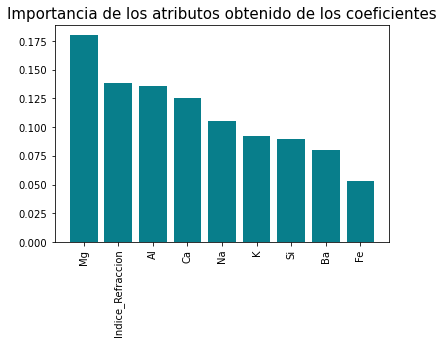

In [19]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Importancia de los atributos obtenido de los coeficientes', size=15)
plt.xticks(rotation='vertical')
plt.show()

### Regularización Least Absolute Shrinkage and Selection Operator (LASSO)

Lo que hace LASSO es que tiene un parámetro de regularización que penaliza a algunas variables y las hace cero. 

In [20]:
#Separar en datos de entrenamiento y de prueba
X= data.drop(labels=['ID', 'Tipo_Vidrio'], axis=1)
Y= data['Tipo_Vidrio']

In [21]:
data.head()

,ID,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo_Vidrio
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


La mayoría de los modelos lineales se benefician de escalar los datos. 

In [22]:
#Escalar datos de entrenamiento
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [23]:
##LASSO
from sklearn.feature_selection import SelectFromModel
sel=LogisticRegression(max_iter= 3000, C=1, penalty='l1', solver='liblinear').fit(X,Y) #LASSO  = L1
sel=SelectFromModel(sel, prefit=True)
X_new=sel.transform(X.to_numpy())
X_new.shape

(214, 8)

In [24]:
pd.DataFrame(X_new)

,0,1,2,3,4,5,6,7
0,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...
209,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [25]:
X.head()

,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


El modelo quitó la variable "Indice de Refracción"

### ¿Cuál es el mejor método?

...no hay...

Se tiene que hacer experimentación para ver qué método funciona mejor para el problema en específico. 

### Referencias:

- Comparison of F-test and mutual information: https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py
- Feature selection: https://scikit-learn.org/stable/modules/feature_selection.html


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Sara E. Rodríguez.
</footer>